In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y = y.reshape(len(y),1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [17]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
regressor.fit(X, y)

/home/tallman/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [22]:
y_pred = regressor.predict(X)

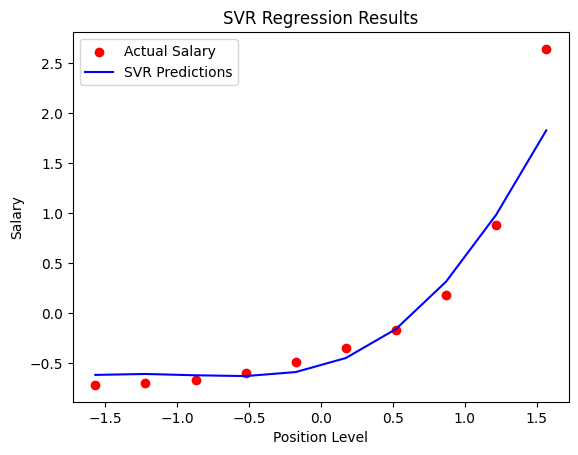

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='red', label='Actual Salary')
plt.plot(X, y_pred, color='blue', label='SVR Predictions')
plt.title('SVR Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

In [31]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.1536
Mean Squared Error (MSE): 0.0735
R² Score: 0.9265
Root Mean Squared Error (RMSE): 0.2712
